In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import squarify

### __1/ Import Data__

In [16]:
Language_df = pd.read_csv('Language.csv')
Mini_Subject_df = pd.read_csv('Mini_Subject.csv')
Course_df = pd.read_csv('Course.csv')
Instructor_df = pd.read_csv('Instructor.csv')
CMS_df = pd.read_csv('Course_Mini_Subject.csv')
CS_df = pd.read_csv('Course_Subtitles.csv')

### __2/ Data Overview__

In [17]:
Course_df.info()
Course_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24393 entries, 0 to 24392
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Course Name        24393 non-null  object 
 1   Language           24393 non-null  object 
 2   Level              24393 non-null  object 
 3   Duration           24393 non-null  float64
 4   Total Sections     24393 non-null  int64  
 5   Total Lectures     24393 non-null  int64  
 6   Total Enrollments  24393 non-null  int64  
 7   Avg Rating Score   24393 non-null  float64
 8   Total Ratings      24393 non-null  int64  
 9   Last Updated       24393 non-null  object 
 10  Price              24393 non-null  int64  
 11  URL                24393 non-null  object 
 12  Instructor Name    24393 non-null  object 
 13  course_id          24393 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 2.6+ MB


,count,mean,std,min,25%,50%,75%,max
Duration,24393.0,9.771287,12.936467,0.5,3.0,5.5,11.5,439.5
Total Sections,24393.0,10.355348,9.991255,1.0,5.0,8.0,13.0,287.0
Total Lectures,24393.0,73.469807,84.144105,3.0,26.0,46.0,87.0,800.0
Total Enrollments,24393.0,6931.213012,35541.667195,0.0,153.0,809.0,3683.0,2026921.0
Avg Rating Score,24393.0,4.162493,0.873771,0.0,4.1,4.4,4.6,5.0
Total Ratings,24393.0,665.821793,6754.194017,0.0,15.0,62.0,231.0,531611.0
Price,24393.0,546459.927028,334195.419278,299000.0,399000.0,399000.0,399000.0,2499000.0
course_id,24393.0,12197.000000,7041.796894,1.0,6099.0,12197.0,18295.0,24393.0


In [18]:
Instructor_df.info()
Instructor_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8925 entries, 0 to 8924
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Instructor Name       8925 non-null   object 
 1   Total Ins's Courses   8925 non-null   int64  
 2   Total Ins's Students  8925 non-null   int64  
 3   Total Ins Reviews     8925 non-null   int64  
 4   Avg Ins Rating        8782 non-null   float64
 5   instructor_id         8925 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 418.5+ KB


,count,mean,std,min,25%,50%,75%,max
Total Ins's Courses,8925.0,7.791709,29.237221,1.0,1.0,3.0,6.0,1541.0
Total Ins's Students,8925.0,37110.200560,172317.872225,0.0,332.0,2819.0,16192.0,4193832.0
Total Ins Reviews,8925.0,5141.823754,39648.904174,0.0,33.0,194.0,1134.0,1252252.0
Avg Ins Rating,8782.0,4.337258,0.442481,0.0,4.2,4.4,4.6,5.0
instructor_id,8925.0,4463.000000,2576.569910,1.0,2232.0,4463.0,6694.0,8925.0


In [19]:
Language_df.info()
Mini_Subject_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   language     49 non-null     object
 1   language_id  49 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 916.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   mini_subject_name  10 non-null     object
 1   mini_subject_id    10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


### __3/ Course Feature Distribution Analysis__

<module 'matplotlib.pyplot' from 'C:\\Users\\Lenovo\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

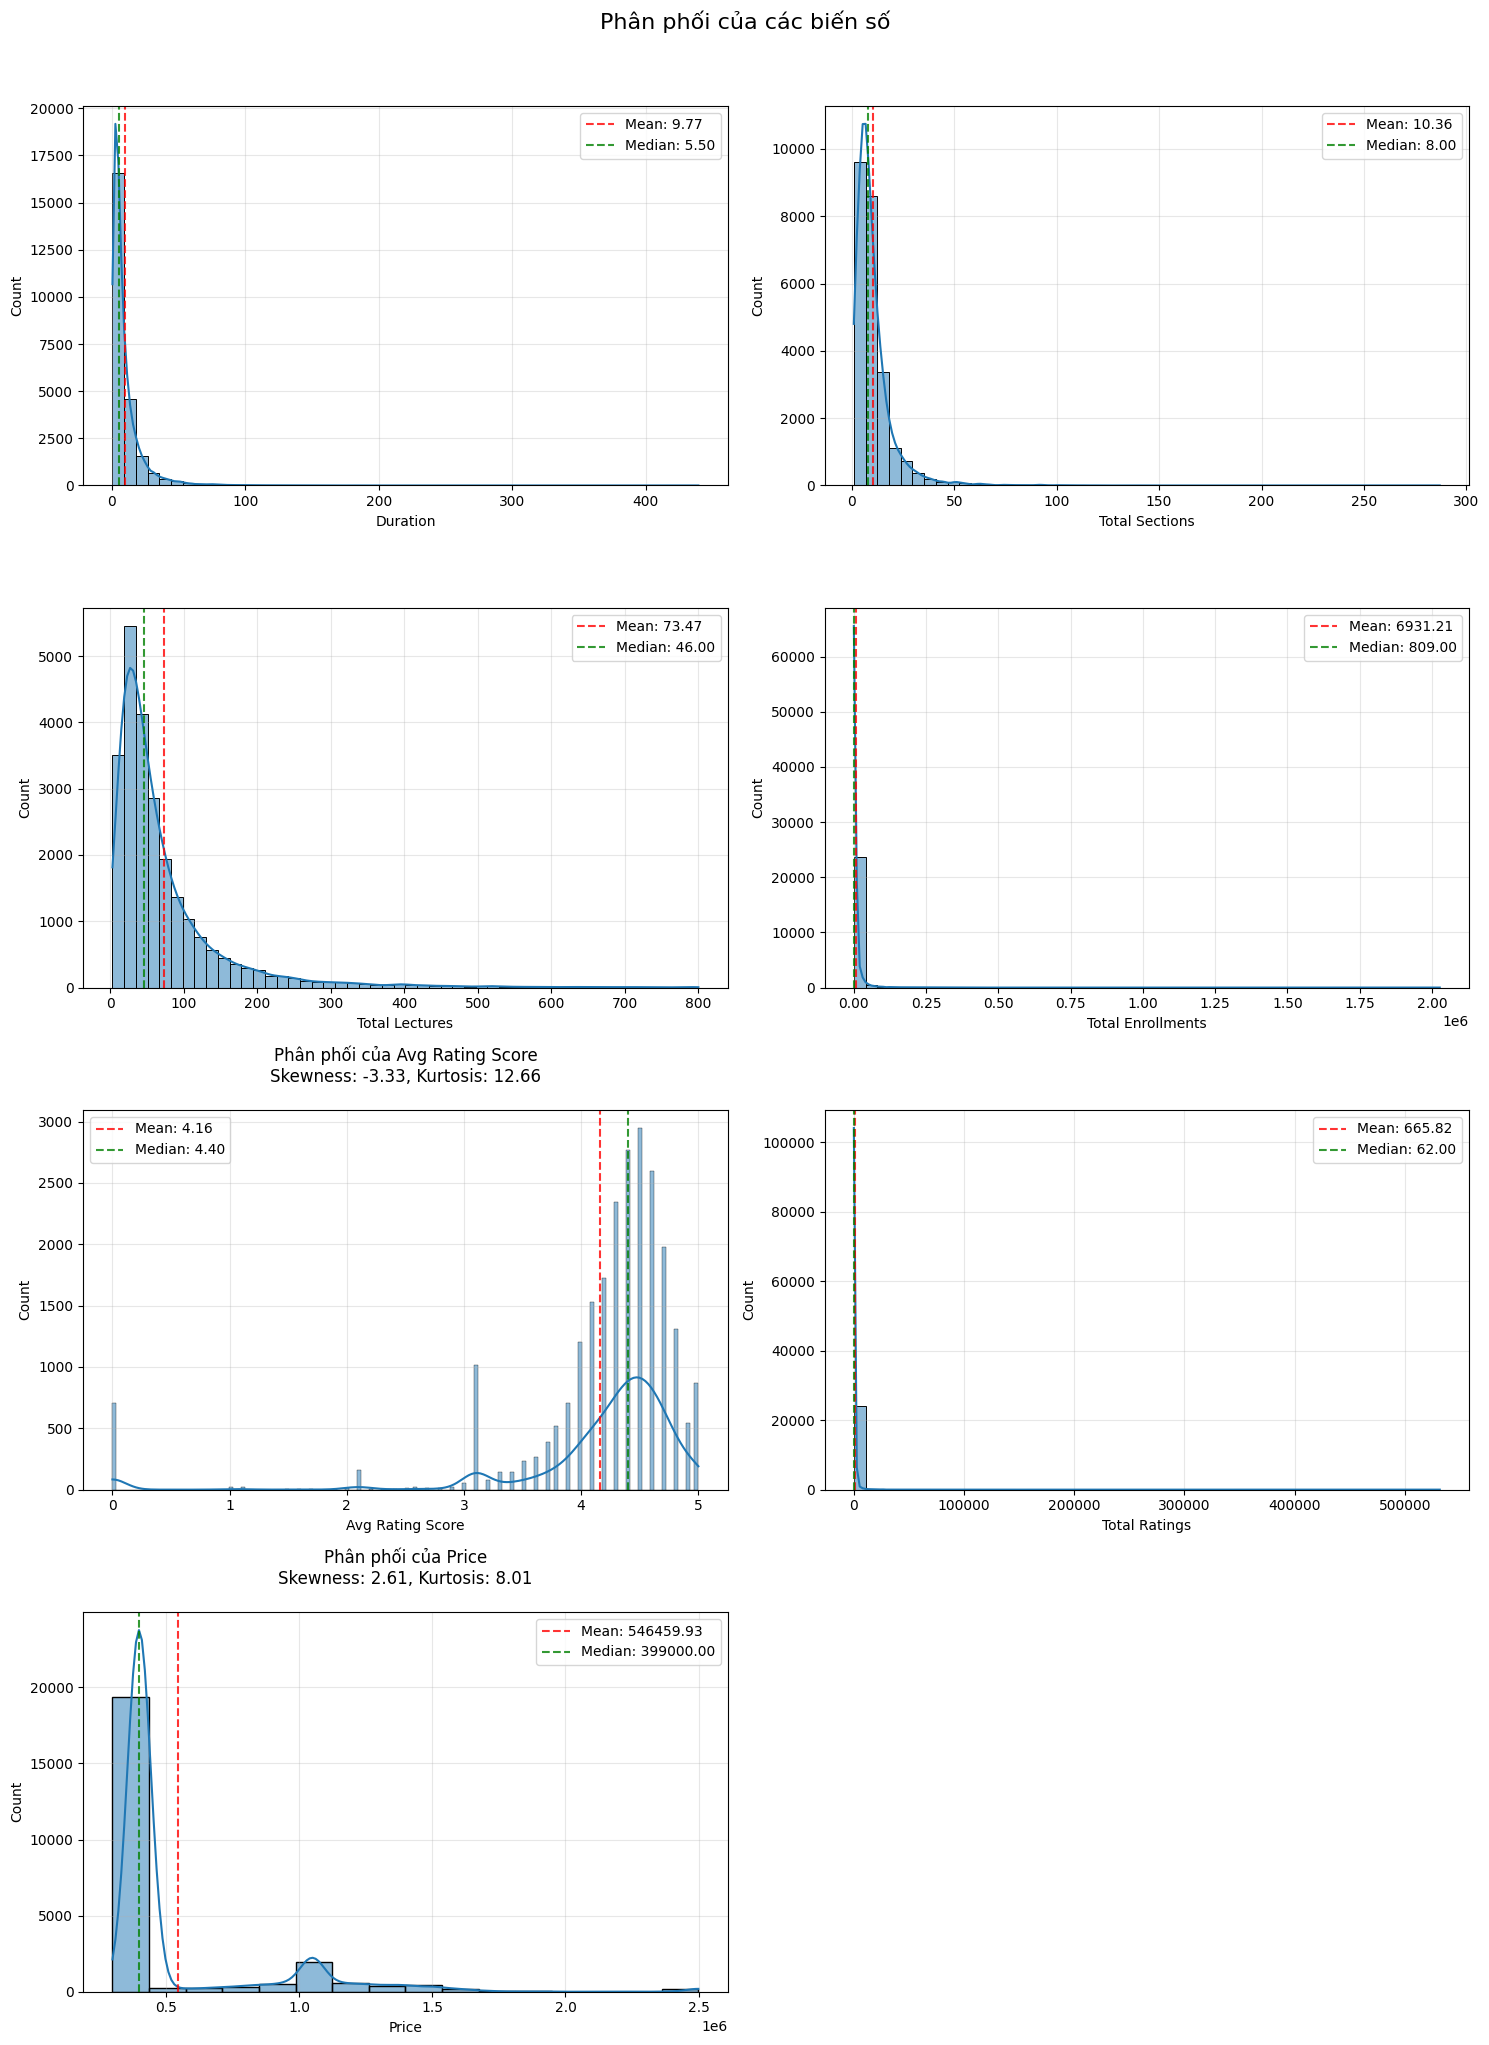

In [20]:
col = ['Duration', 'Total Sections', 'Total Lectures', 'Total Enrollments', 'Avg Rating Score', 'Total Ratings', 'Price']

def plot_distribution(data, col, n_cols=2):
    n_rows = int(np.ceil(len(col) / n_cols))
    fig = plt.figure(figsize=(15, 5*n_rows))

    for idx, column in enumerate(col, 1):
        ax = plt.subplot(n_rows, n_cols, idx)
        sns.histplot(data=data, x=column, kde=True, ax=ax, )
        
        # Tính các thống kê cơ bản
        mean_val = data[column].mean()
        median_val = data[column].median()
        skew_val = data[column].skew()
        kurt_val = data[column].kurtosis()
        
        # Vẽ đường vertical line cho mean và median
        ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Median: {median_val:.2f}')
        
        ax.set_title(f'Phân phối của {column}\n' + 
                    f'Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}', 
                    pad=20)
        
        ax.legend()
        
        ax.grid(True, alpha=0.3)
        
        if data[column].nunique() > 50:
            # Sử dụng Freedman-Diaconis rule để tính số bins tối ưu
            q75, q25 = np.percentile(data[column], [75, 25])
            iqr = q75 - q25
            bin_width = 2 * iqr / (len(data[column]) ** (1/3))
            if bin_width > 0:
                bins = int((data[column].max() - data[column].min()) / bin_width)
                ax.clear()
                sns.histplot(data=data, x=column, bins=min(bins, 50), kde=True, ax=ax)
                ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
                ax.axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Median: {median_val:.2f}')
                ax.legend()
                ax.grid(True, alpha=0.3)

    fig.suptitle('Phân phối của các biến số', fontsize=16, y=1.02)
    
    plt.tight_layout()
    
    return plt

plot_distribution(Course_df, col)


#### __Nhận xét:__
1. **Duration, Total Sections, Total lectures:** 
    - Tổng quan: cả 3 biểu đồ có hình dạng phân phối lệch phải rõ ràng.
    - Phần lớn các khóa học có thời lượng ngắn, nằm trong khoảng từ dưới 20 giờ.Có một số khóa học có thời lượng rất dài (trên 100, thậm chí đến 400 giờ), nhưng những trường hợp này rất ít.
    - Các khóa học được chia thành nhiều section, tuy nhiên chủ yếu là dưới 20 phần với đỉnh của biểu đồ tập trung trong khoảng 5–10 phần. Một số ít các khóa học có số lượng section cực kì cao (hơn 100 phần, thậm chí gần 300 phần).
    - Phần lớn các khoá học có số bài giảng tập trung ở khoảng dưới 100 bài và có số ít khóa học có lượng bài giảng lớn (Lên đến 800 bài giảng)
    
    => Một khóa học có thời lượng dài, nó cũng có nhiều bài giảng hơn và chia thành nhiều phần hơn, tuy nhiên vẫn có một số trường hợp đặc biệt.

2. **Total Enrollments:**
    - Phân phối lệch phải cực mạnh: hầu hết các khóa học có số lượng đăng ký từ dưới 50K lượt, tuy nhiên một số ít các khóa học có lượt đăng ký cực kỳ cao, lên đến hàng trăm hoặc triệu lượt. Điều này tạo ra một đuôi dài bên phải biểu đồ.

3. **Avg Rating Score:**
    - Phân phối lệch trái: hầu hết các khóa học có điểm đánh giá từ 4.0 đến 5.0. Một số các khóa học có điểm rất thấp (0 - 2.0) nhưng không nhiều.
    
4. **Total Rating:**
    - Phân phối lệnh phải cực mạnh: hầu hết các khóa học đều có số lượt đánh giá dưới 1000, tuy nhiên một số ít các khóa học có lượt đánh giá cực cao, lên đến vài chục nghìn lượt, điều này tạo một đuôi dài bên phải biểu đồ.

5. **Price:**
    - Phân phối lệch phải: hầu hết các khóa học có giá nằm trong khoảng từ 200K - 400K, có một số mức giá cao kéo dài về phía phải, tạo ra đuôi dài.


### __4/ Instructor Feature Distribution Analysis__

<module 'matplotlib.pyplot' from 'C:\\Users\\Lenovo\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

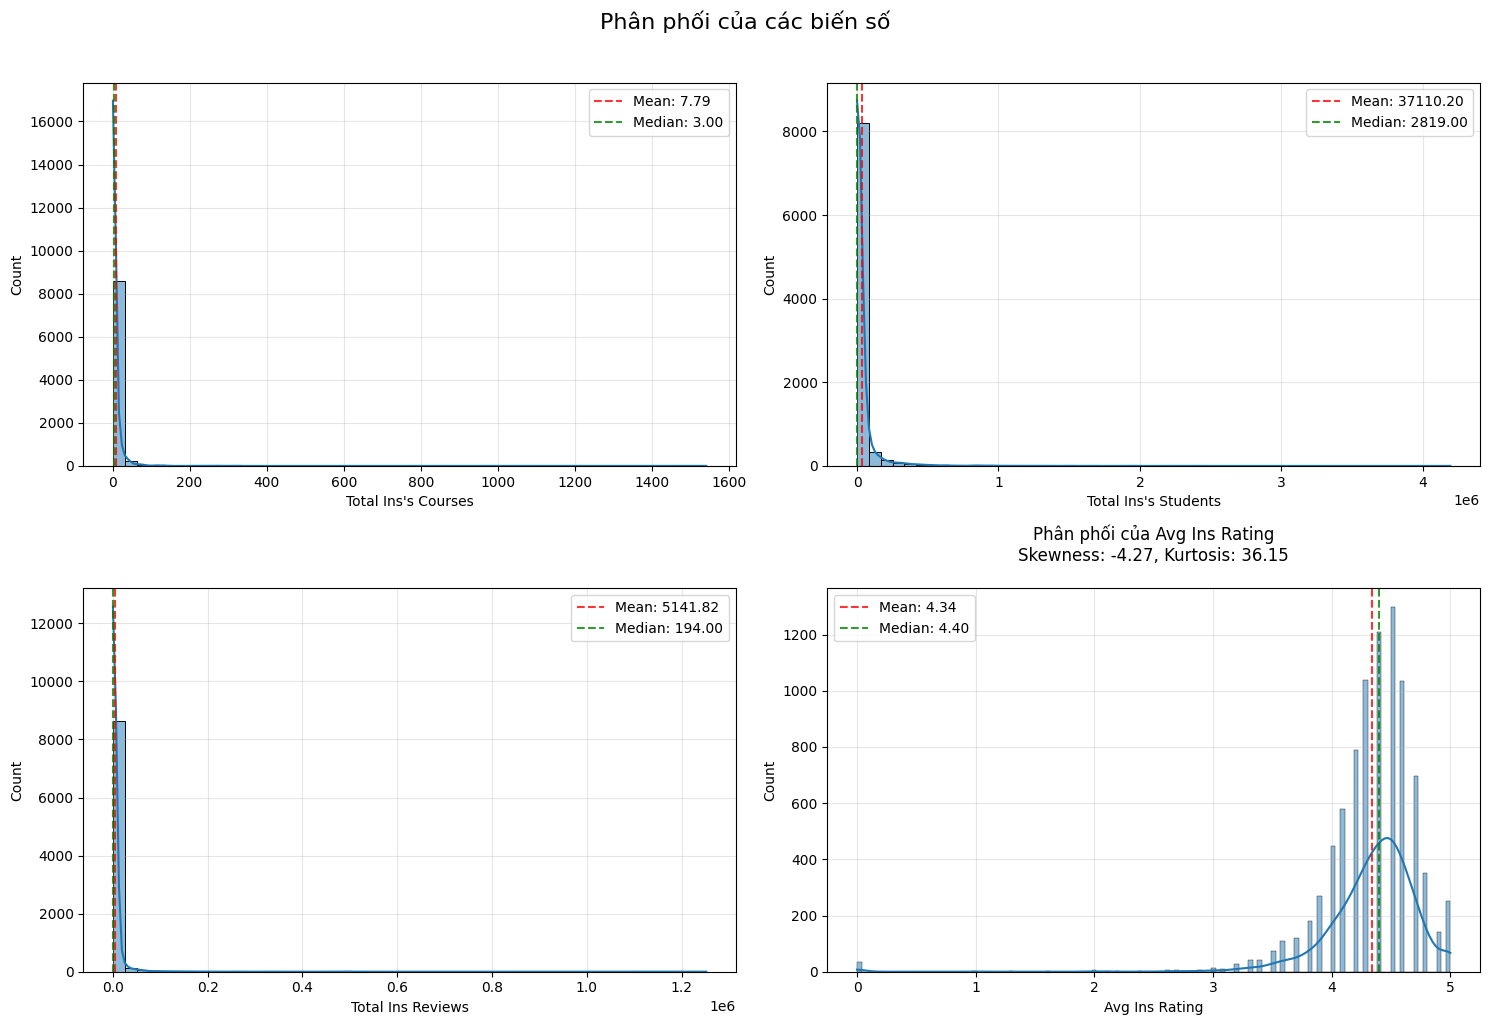

In [21]:
col = ["Total Ins's Courses", "Total Ins's Students", 'Total Ins Reviews', 'Avg Ins Rating']

def plot_distribution(data, col, n_cols=2):
    n_rows = int(np.ceil(len(col) / n_cols))
    fig = plt.figure(figsize=(15, 5*n_rows))
     
    for idx, column in enumerate(col, 1):
        ax = plt.subplot(n_rows, n_cols, idx)
        sns.histplot(data=data, x=column, kde=True, ax=ax, )
        
        # Tính các thống kê cơ bản
        mean_val = data[column].mean()
        median_val = data[column].median()
        skew_val = data[column].skew()
        kurt_val = data[column].kurtosis()
        
        # Vẽ đường vertical line cho mean và median
        ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Median: {median_val:.2f}')
        
        ax.set_title(f'Phân phối của {column}\n' + 
                    f'Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}', 
                    pad=20)

        ax.legend()

        ax.grid(True, alpha=0.3)

        if data[column].nunique() > 50:
            # Sử dụng Freedman-Diaconis rule để tính số bins tối ưu
            q75, q25 = np.percentile(data[column], [75, 25])
            iqr = q75 - q25
            bin_width = 2 * iqr / (len(data[column]) ** (1/3))
            if bin_width > 0:
                bins = int((data[column].max() - data[column].min()) / bin_width)
                ax.clear()
                sns.histplot(data=data, x=column, bins=min(bins, 50), kde=True, ax=ax)
                ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
                ax.axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Median: {median_val:.2f}')
                ax.legend()
                ax.grid(True, alpha=0.3)
    
    fig.suptitle('Phân phối của các biến số', fontsize=16, y=1.02)

    plt.tight_layout()
    
    return plt

plot_distribution(Instructor_df, col)


#### __Nhận xét:__
1. **Total Ins's Courses:** 
    - Phân phối lệch phải: hầu hết các giảng viên có ít khóa học, chủ yếu dưới 30 khóa. Có những giảng viên có trên 1000 khóa học, đây có thể là những tổ chức hoặc nhóm giảng viên.
    
2. **Total Ins's Students:**
    - Cực kỳ lệch phải, phần lớn giảng viên có số lượng học viên thấp (từ vài nghìn đến vài chục nghìn), nhưng một số giảng viên có hàng triệu học viên.

3. **Total Ins's Reviews:**
    - Phân phối cực kỳ lệch phải: hầu hết các giảng viên có lượt đánh giá khoảng dưới 20K lượt, tuy nhiên một số giảng viên có lượt đánh giá rất cao dẫn đến tạo đuôi dài phía bên phải biểu đồ.

4. **Avg Ins Rating:**
    - Phân phối lệch trái: Đa số các giảng viên nhận được mức đánh giá rất cao (4.0 - 5.0), dù cho vẫn có các giảng viên nhận đánh giá thấp nhưng số lượng không đáng kể.

### __5/ Course Distribution by Mini_Subject__

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7996\4132965240.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot =sns.barplot(x='mini_subject_name', y = 'cate_count', data=cate_count, palette='Paired')


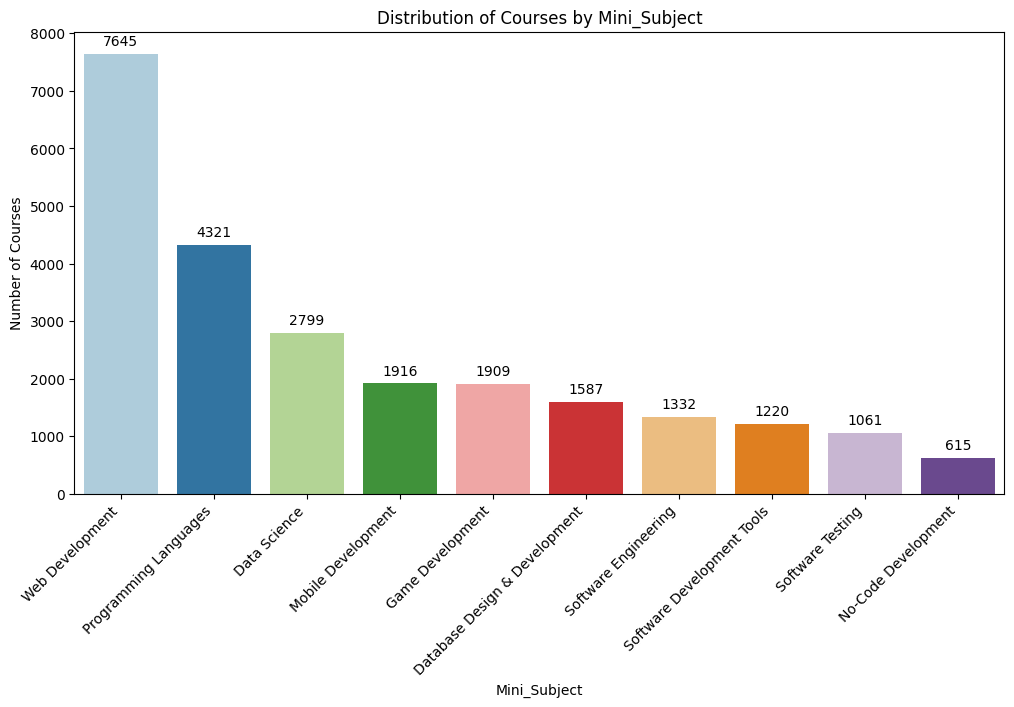

In [22]:

cate_count = CMS_df['mini_subject_id'].value_counts().reset_index()
cate_count.columns = ['mini_subject_id', 'cate_count']
cate_count = pd.merge(cate_count, Mini_Subject_df, on='mini_subject_id', how='inner')


plt.figure(figsize=(12,6))
barplot =sns.barplot(x='mini_subject_name', y = 'cate_count', data=cate_count, palette='Paired')
plt.title('Distribution of Courses by Mini_Subject')
plt.xlabel('Mini_Subject', fontsize =10)
plt.ylabel('Number of Courses')
plt.xticks(rotation=45, ha = 'right')

for p in barplot.patches:
    barplot.annotate(format(int(p.get_height()), 'd'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

plt.show()


#### __Nhận xét:__
- Các khóa học trên Udemy thuộc nhiều chủ đề khác nhau, có những khóa học liên quan cùng lúc đến nhiều chủ đề. Trong đó, chủ đề chiếm đa số trong các khóa học là Web Development (7646 khóa) và ít nhất là chủ đề No-Code Development (chỉ với 617 khóa).

### __5/ Course Distribution by Language__

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7996\101789585.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x= 'language', y = 'rate', data = Lang_count, palette='Paired')


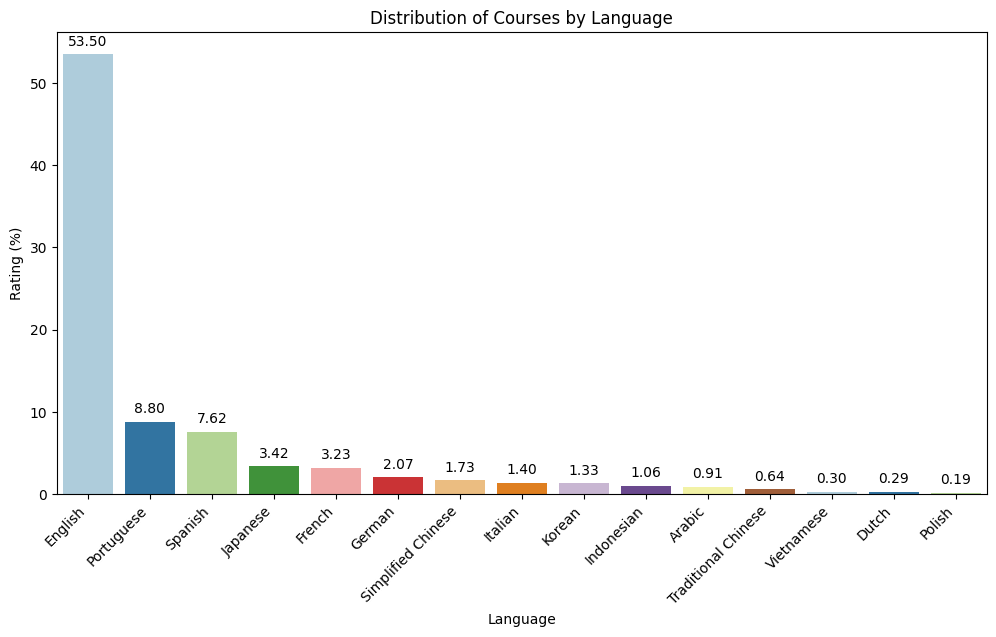

In [23]:
Lang_count = CS_df['language_id'].value_counts().reset_index().sort_index(ascending= True).head(15)
Lang_count.columns = ['language_id', 'lang_count']

total_course = Course_df['course_id'].nunique()

Lang_count['rate'] = round((Lang_count['lang_count'] / total_course)*100,2)

Lang_count = pd.merge(Lang_count, Language_df, on='language_id', how='inner')

plt.figure(figsize=(12,6))
barplot = sns.barplot(x= 'language', y = 'rate', data = Lang_count, palette='Paired')
plt.title('Distribution of Courses by Language')
plt.xlabel('Language')
plt.ylabel('Rating (%)')
plt.xticks(rotation=45, ha = 'right')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points',
                     )
plt.show()


#### __Nhận xét:__
- Mỗi khóa học sẽ được hỗ trợ bởi nhiều ngôn ngữ khác nhau để có thể tiếp cận đến các học viên một cách rộng rãi hơn. Trong đó, ngôn ngữ phổ biến nhất, được hổ trợ nhiều nhất là tiếng Anh, chiếm đến 53.49% trên tổng số khóa học, các ngông ngữ phổ biến kế tiếp là Bồ Đào Nha (8.83%) và Tây Ban Nha (7.62%). Các khóa học còn hỗ trợ nhiều ngôn ngữ khác nhưng chiếm tỷ lệ khá thấp.

### __6/ Correlation Analysis of Course Features__

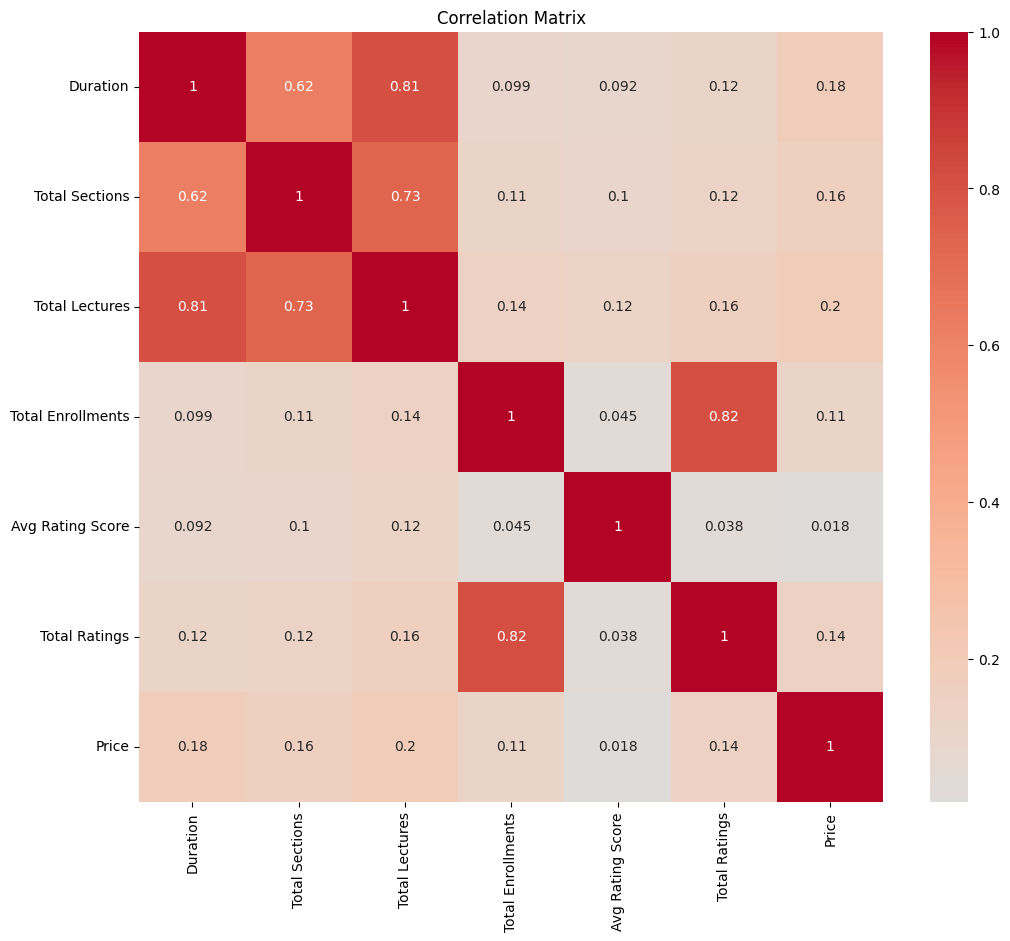

In [24]:
corr_matrix = Course_df[['Duration', 'Total Sections', 'Total Lectures', 'Total Enrollments', 'Avg Rating Score', 'Total Ratings', 'Price']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#### __Nhận xét:__
- Giữa các đặc trưng Duration, Total Sections và Total Lecture có tương quan dương mạnh, điều này cho biết các khóa học càng dài thì sẽ được chia thành nhiều section và nhiều lecture hơn.
- Còn lại, các đặc trưng có tương quan yếu với nhau (< 0.2)

### __7/ Correlation Analysis of Instructor Features__

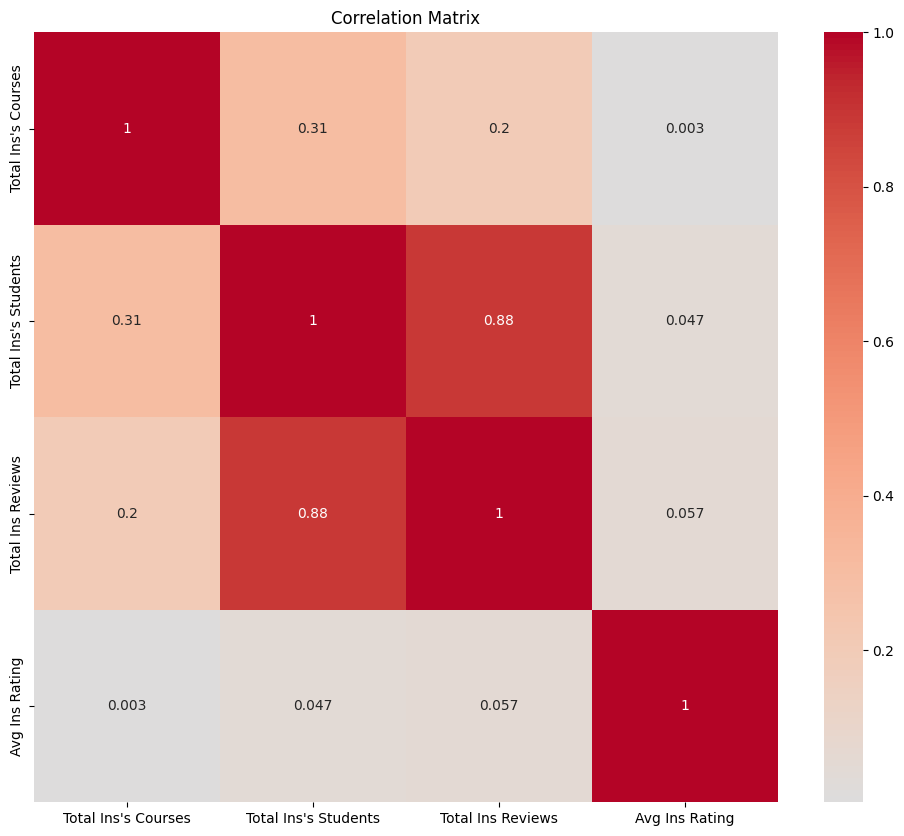

In [25]:
corr_matrix = Instructor_df[["Total Ins's Courses", "Total Ins's Students", 'Total Ins Reviews', 'Avg Ins Rating']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#### __Nhận xét:__
- Có sự tương quan rất mạnh giữa 2 đặc trưng Total Ins's Students và Total Ins's Reviews (0.9). Điều này cho thấy giảng viên càng có nhiều học viên thì càng nhận được nhiều đánh giá.
- Giữa 2 biến Total Ins's Students và Total Ins's Courses có sự tương quan dương trung bình.

### __Kết luận:__
- Dataset không có giá trị ngoại lai hay dị thường.
- Giữa các đặc trưng hầu hết không có sự tương quan.
- Sự thành công của các khóa học là khác nhau: có những khóa học thu hút được lượng lớn học viên, nhận được nhiều phản hồi và có mức đánh giá cao, tuy nhiên có những khóa học không được thành công như vậy.